In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import seaborn as sns

%matplotlib notebook

<IPython.core.display.Javascript object>


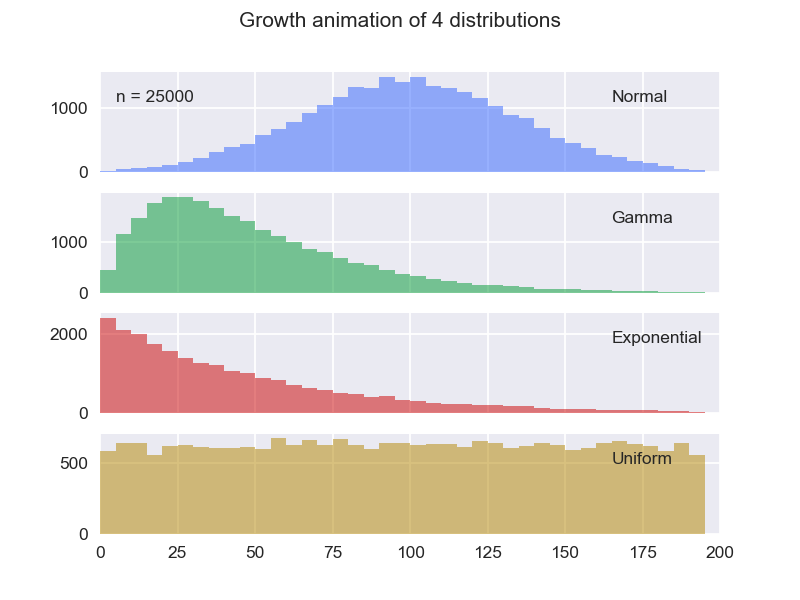

In [2]:

# NOTE - there are 25,000 samples - BUT, animation proceeds as curr**2 - 
## so it counts through quicklyy

n = 25000 # number of samples

x1 = np.random.normal(100, 35, n)
x2 = np.random.gamma(2, 25, n)
x3 = np.random.exponential(50, n)
x4 = np.random.uniform(0,200, n)


def update(curr):
    #to accelerate the animation
    count = curr**2

    # check if animation is at the last frame, and if so, stop the animation a
    if count >= n: 
        a.event_source.stop() # a is name of animation   
    
    # handy iterator for axes
    axes = [ax1, ax2, ax3, ax4]
    
    for ax in axes:
        ax.cla()
        for label in ax.get_yticklabels():
            label.set_visible(True)
        for label in ax.get_xticklabels():
            if ax == ax4:
                label.set_visible(True)
            else:
                label.set_visible(False)
    
    #ax4.set_xticklabels.set_visible(True)
    bins = np.arange(0, 200, 5)        

    ax1.hist(x1[:count], bins = bins, color = '#3366ff', alpha = 0.5)
    ax2.hist(x2[:count], bins = bins, color = '#009933', alpha = 0.5)
    ax3.hist(x3[:count], bins = bins, color = '#cc0000', alpha = 0.5)
    ax4.hist(x4[:count], bins = bins, color = '#b38600', alpha = 0.5)

    # set x & y lim
    ax1.set_xlim(0,200)
    
    # if ylim < 50, set at 50, otherwise let autoset
    for ax in axes:
        if ax.get_ylim()[1] <50:
            ax.set_ylim(0,50)
    
    
    # annotate each axes with label - at x = 165 & y = 0.7 * max
    for ax in axes:
        if ax == ax1:
            text = 'Normal'
        elif ax == ax2:
            text = 'Gamma'
        elif ax == ax3:
            text = 'Exponential'
        else:
            text = 'Uniform'
        y = (ax.get_ylim()[1] - ax.get_ylim()[0])*0.7
        ax.annotate(text, [165, y])
    
    
    y1 = (ax1.get_ylim()[1] - ax1.get_ylim()[0])*0.7
    if count <=n:
        z = count
    else:
        z = n
        
    ax1.annotate('n = {}'.format(z), [5,y1])

    
## Main animation
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex = True)
fig.suptitle('Growth animation of 4 distributions')
a = animation.FuncAnimation(fig, update, interval=50)